In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import datetime  
from matplotlib import dates as mpl_dates   

plt.rcParams["font.family"] = "Times New Roman" 

start = datetime.datetime(2020, 3, 27, 17,0) 

In [25]:
# burst-averaged velocity data for depth, where the pairs of beams intersect:

bbb1=pd.read_csv(r"C:\Users\User\My Nortek\b1new.csv")
bbb2=pd.read_csv(r"C:\Users\User\My Nortek\b2new.csv")
bbb3=pd.read_csv(r"C:\Users\User\My Nortek\b3new.csv")
bbb4=pd.read_csv(r"C:\Users\User\My Nortek\b4new.csv")
bbb5=pd.read_csv(r"C:\Users\User\My Nortek\b5new.csv")
bbb6=pd.read_csv(r"C:\Users\User\My Nortek\b6new.csv")

# radiation data:

rad=pd.read_csv(r"C:\Users\User\My Nortek\radiation1.csv")


ib2=pd.DataFrame( data = bbb2, index = None , columns = None , dtype = None ,copy = False )
ib1=pd.DataFrame( data = bbb1 , index = None , columns = None , dtype = None ,copy = False )
ib3=pd.DataFrame( data = bbb3 , index = None , columns = None , dtype = None ,copy = False )
ib4=pd.DataFrame( data = bbb4 , index = None , columns = None , dtype = None ,copy = False )
ib5=pd.DataFrame( data = bbb5 , index = None , columns = None , dtype = None ,copy = False )
ib6=pd.DataFrame( data = bbb6 , index = None , columns = None , dtype = None ,copy = False )

# Choosing the time interval from   18:10 March 27  to 02:10 April 5

b1=ib1.iloc[100:12000]
b2=ib2.iloc[100:12000]
b3=ib3.iloc[100:12000]
b4=ib4.iloc[100:12000]
b5=ib5.iloc[100:12000]
b6=ib6.iloc[100:12000]


# Rename the columns

b1.columns=['0','1']
b2.columns=['0','1']
b3.columns=['0','1']
b4.columns=['0','1']
b5.columns=['0','1']
b6.columns=['0','1']


# Choose the column with data

bb1=b1['1']
bb2=b2['1']
bb3=b3['1']
bb4=b4['1']
bb5=b5['1']
bb6=b6['1']



In [26]:
# Averaging interval:

t0=100

# Mean and pulsation beam velocities

B2=bb2.rolling(t0,center=True).mean()
B1=bb1.rolling(t0,center=True).mean()
B3=bb3.rolling(t0,center=True).mean()
B4=bb4.rolling(t0,center=True).mean()
B5=bb5.rolling(t0,center=True).mean()
B6=bb6.rolling(t0,center=True).mean()

b2=bb2-B2
b1=bb1-B1
b3=bb3-B3
b4=bb4-B4
b5=bb5-B5
b6=bb6-B6

# Intensities of beam velocities pulsations and covariances

b11=b1**2
b22=b2**2
b33=b3**2
b44=b4**2
b55=b5**2

b26=b2*b6
b35=b3*b5
b77=b6**2


In [27]:
#Transformation matrices for both devices

a0=3.14159*25/180
ta=np.tan(a0)
sin=np.sin(a0)
cos=np.cos(a0)
cta=1/ta
cta

M1=np.matrix([ 
    [1, 0,cta], 
    [-0.5, (3**(0.5)/2), cta], 
    [-0.5, -(3**(.5)/2), cta] 
   ]) 

M1i=M1**(-1)
M1i

M2=np.matrix([ 
    [-1, 0,cta], 
    [0.5, -(3**(0.5)/2), cta], 
    [0.5, (3**(.5)/2), cta] 
   ]) 

M1i=M1**(-1)
M1i

M2i=M2**(-1)
#M2i
M2i


#Components of the mean velocities in Cartesian frame for both devices:

UI1=6.66666667e-01*B1  -3.33333333e-01*B2  -3.33333333e-01*B3
UI2=5.09525327e-17*B1+   5.77350269e-01*B2  -5.77350269e-01*B3
UI3=1.55435736e-01*B1+   1.55435736e-01*B2+   1.55435736e-01*B3

UII1=-6.66666667e-01*B4  +3.33333333e-01*B5  +3.33333333e-01*B6
UII2=-5.09525327e-17*B4-   5.77350269e-01*B5+  5.77350269e-01*B6
UII3=1.55435736e-01*B4+   1.55435736e-01*B5+   1.55435736e-01*B6

#ttt=np.arange(4000,12000,1)
ttt=np.arange(100,12000,1)
#time=(ttt-4000)/60
time=(ttt-100)/60



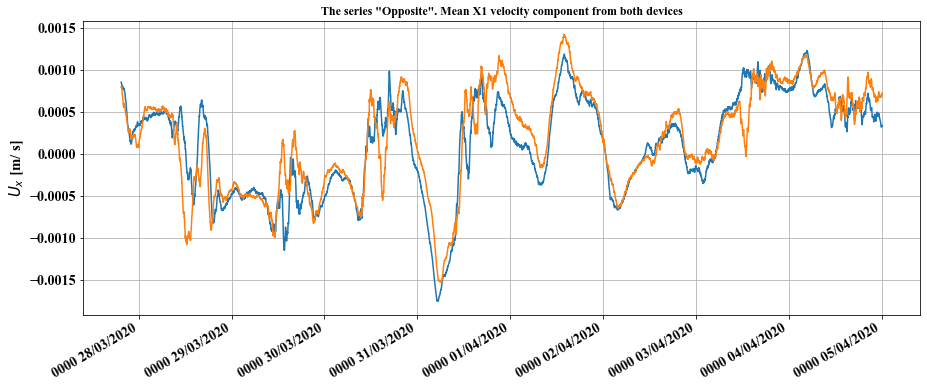

In [28]:
start = datetime.datetime(2020, 3, 27, 17,0) #Время нулевой точки (year, month, day, hour, minute, second)

t11=100
t22=12000

plt.figure(figsize=(15,6))  #построение графика
X = [start + datetime.timedelta(minutes=i) for i in range(t11,t22)] #Значения по оси X (начальное время + минуты) (диапазон от t11 до t22)
Y1 = [UI1[i] for i in range(t11, t22)] #значения игрик
Y2 = [UII1[i] for i in range(t11, t22)] 

plt.plot(X, Y1)  #график x(Y)
plt.plot(X, Y2)

#plt.xlabel('Data', fontsize = 14, fontname="Times New Roman") #Подпись оси и формат подписи
plt.ylabel('Y', fontsize = 14, fontname="Times New Roman")    #Подпись оси и формат подписи
plt.gcf().autofmt_xdate() #для форматирования даты
plt.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter('%H%M %d/%m/20%y')) #Формат даты
plt.tick_params(axis='both', which='major', labelsize=14)  #Формат значений по осям
plt.grid()
plt.title('The series "Opposite". Mean X1 velocity component from both devices')
p.ylabel('$U_x$ [m/ s]',fontsize=15)
plt.show()


-209.69445368539914

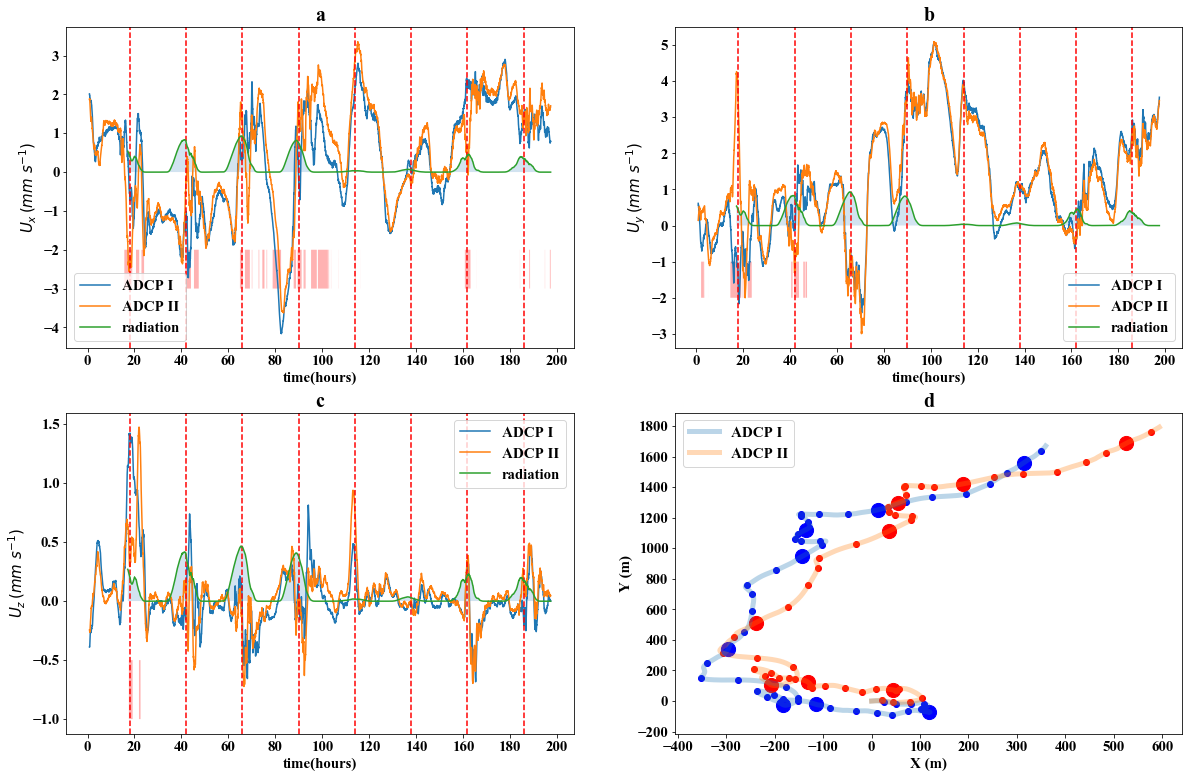

In [29]:
ra=rad.iloc[0:10920]

ra.index=np.arange(1080,12000,1)#len(ra))
ra.columns=['0','1','2']
r=ra['2']
rr=r.rolling(t0,center=True).mean()

tttr=np.arange(1080,12000,1)
#time=(ttt-4000)/60
rtime=(tttr-100)/60

#plt.plot(rtime,rr)
#plt.show()



s1=2*60*UI1.cumsum()/sin
Is1=2*60*UII1.cumsum()/sin

s2=2*60*UI2.cumsum()/sin
Is2=2*60*UII2.cumsum()/sin

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(2,2, figsize=(20,13))

xcoords=np.arange(1080/60,12000/60,1440/60)


ax[0,0].plot(time,1000*UI1/sin,label='ADCP I')
ax[0,0].plot(time,1000*UII1/sin,label='ADCP II')

ax[0,0].fill_between(time,-3,-2, where = (1000*abs(UI1-UII1)/sin > 0.8), facecolor='red', alpha=0.3,interpolate=True)
                                         #0.2*(abs(UI1)+abs(UII1))), facecolor='blue', alpha=0.3,interpolate=True)


ax[0,0].set_xlabel('time(hours)',fontsize=15)
ax[0,0].set_ylabel('$U_x \/(mm\/ \/ s^{-1})$',fontsize=15)
ax[0,0].set_title('a',fontsize=20)

for xc in xcoords:
    ax[0,0].axvline(x=xc,color='r', linestyle='--')


#fig.set_figwidth(12)
#fig.set_figheight(8)
ax[0,0].xaxis.set_major_locator(ticker.MultipleLocator(20))
ax[0,0].yaxis.set_major_locator(ticker.MultipleLocator(1))
#ax[0,0].yaxis.set_major_locator(ticker.MultipleLocator(0.5))

ax[0,0].tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               labelsize = 15)    #  Размер подписи
              
ax[0,0].plot(rtime,rr/100, label='radiation')
ax[0,0].fill_between(rtime,0.001,rr/100,alpha=0.2)

ax[0,0].legend(fontsize=15)

#ax[0].fill_between(x,-0.004,0.003, where = (abs(dfX1-dfX2) > 0.001), facecolor='green', alpha=0.3,interpolate=True)
    
ax[0,1].plot(time,1000*UI2/sin,label='ADCP I')
ax[0,1].plot(time,1000*UII2/sin,label='ADCP II')
ax[0,1].set_xlabel('time(hours)',fontsize=15)
ax[0,1].set_ylabel('$U_y \/(mm\/ \/ s^{-1})$',fontsize=15)
ax[0,1].set_title('b',fontsize=20)

for xc in xcoords:
    ax[0,1].axvline(x=xc,color='r', linestyle='--')

ax[0,1].legend(fontsize=15)

ax[0,1].fill_between(time,-2,-1, where = (1000*abs(UI2-UII2)/sin > 0.8), facecolor='red', alpha=0.3,interpolate=True)

#fig.set_figwidth(12)
#fig.set_figheight(8)
ax[0,1].xaxis.set_major_locator(ticker.MultipleLocator(20))
ax[0,1].yaxis.set_major_locator(ticker.MultipleLocator(1))

ax[0,1].tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               labelsize = 15)    #  Размер подписи


ax[0,1].plot(rtime,rr/100, label='radiation')
ax[0,1].legend(fontsize=15)
ax[0,1].fill_between(rtime,0.001,rr/100,alpha=0.2)

ax[1,0].plot(time,1000*UI3/sin,label='ADCP I')
ax[1,0].plot(time,1000*UII3/sin,label='ADCP II')
ax[1,0].set_xlabel('time(hours)',fontsize=15)
ax[1,0].set_ylabel('$U_z \/(mm\/ \/ s^{-1})$',fontsize=15)
ax[1,0].set_title('b',fontsize=20)

for xc in xcoords:
    ax[1,0].axvline(x=xc,color='r', linestyle='--')

ax[1,0].fill_between(time,-1,-0.5, where = (1000*abs(UI3-UII3)/sin > 0.8), facecolor='red', alpha=0.3,interpolate=True)

ax[1,0].set_title('c',fontsize=20)

#fig.set_figwidth(12)
#fig.set_figheight(8)
ax[1,0].xaxis.set_major_locator(ticker.MultipleLocator(20))
ax[1,0].yaxis.set_major_locator(ticker.MultipleLocator(0.5))

ax[1,0].tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               labelsize = 15)    #  Размер подписи

ax[1,0].plot(rtime,rr/100/2, label='radiation')
ax[1,0].legend(fontsize=15)
ax[1,0].fill_between(rtime,0.001,rr/100/2,alpha=0.2)

ax[1,1].plot(s1,s2,label='ADCP I',linewidth=5, alpha=0.3)
ax[1,1].plot(Is1,Is2,label='ADCP II',linewidth=5, alpha=0.3)
ax[1,1].set_xlabel('X (m)',fontsize=15)
ax[1,1].set_ylabel('Y (m)',fontsize=15)
ax[1,1].legend(fontsize=15)
ax[1,1].set_title('d',fontsize=20)

ax[1,1].xaxis.set_major_locator(ticker.MultipleLocator(100))
ax[1,1].yaxis.set_major_locator(ticker.MultipleLocator(200))

ax[1,1].tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               labelsize = 15)    #  Размер подписи

xmi=100
xmf=12001
xm=xmi
while xm < xmf:
    ax[1,1].scatter(s1[xm],s2[xm],color='b')
    ax[1,1].scatter(Is1[xm],Is2[xm],color='r')
    xm=xm+240

xmi=100
xmf=12001
xm=xmi
while xm < xmf:
    ax[1,1].scatter(s1[xm],s2[xm],color='b',s=200)
    ax[1,1].scatter(Is1[xm],Is2[xm],color='r',s=200)
    xm=xm+1440
#for xc in xcoords:
#    ax[1,1].scatter(s1[60*xc],s2[60*xc])
              
    
#plt.show()

plt.savefig("Fig 1.png",dpi=600)
s1[5000]



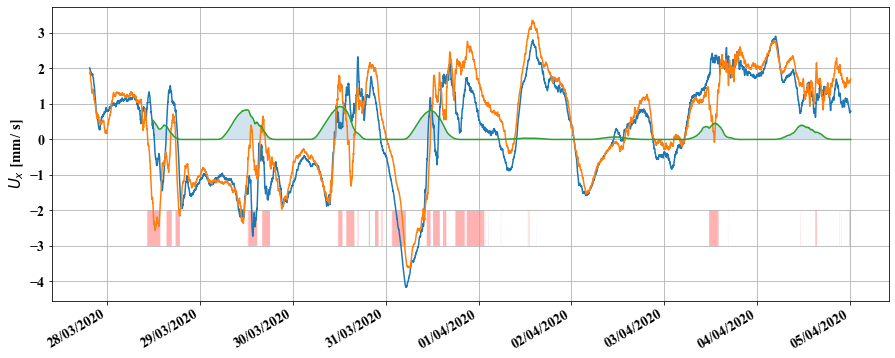

In [30]:
start = datetime.datetime(2020, 3, 27, 17,0) #Время нулевой точки (year, month, day, hour, minute, second)

t11=100
t22=12000



plt.figure(figsize=(15,6))  #построение графика

#xcoords=np.arange(1080/60,12000/60,1440/60)
#for xc in xcoords:
#    plt.axvline(x=xc,color='r', linestyle='--')


X = [start + datetime.timedelta(minutes=i) for i in range(t11,t22)] #Значения по оси X (начальное время + минуты) (диапазон от t11 до t22)
X1 = [start + datetime.timedelta(minutes=i) for i in range(t11+980,t22)]

Y1 = [1000*UI1[i]/sin for i in range(t11, t22)] 
Y2 = [1000*UII1[i]/sin for i in range(t11, t22)] 
Y3=[rr[i]/100 for i in range (t11+980,t22)]


Y3[10749]


plt.plot(X, Y1) 
plt.plot(X, Y2)

plt.plot(X1,Y3)

plt.fill_between(X1,0.001,Y3,alpha=0.2)

plt.fill_between(X,-3,-2, where = (1000*abs(UI1-UII1)/sin > 0.8), facecolor='red', alpha=0.3,interpolate=True)


#plt.ylabel('Y', fontsize = 14, fontname="Times New Roman")    #Подпись оси и формат подписи

p.ylabel('$U_x$ [mm/ s]',fontsize=15)
plt.gcf().autofmt_xdate() #для форматирования даты

plt.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter('%d/%m/20%y')) 

plt.tick_params(axis='both', which='major', labelsize=14)  
plt.grid()
plt.show()

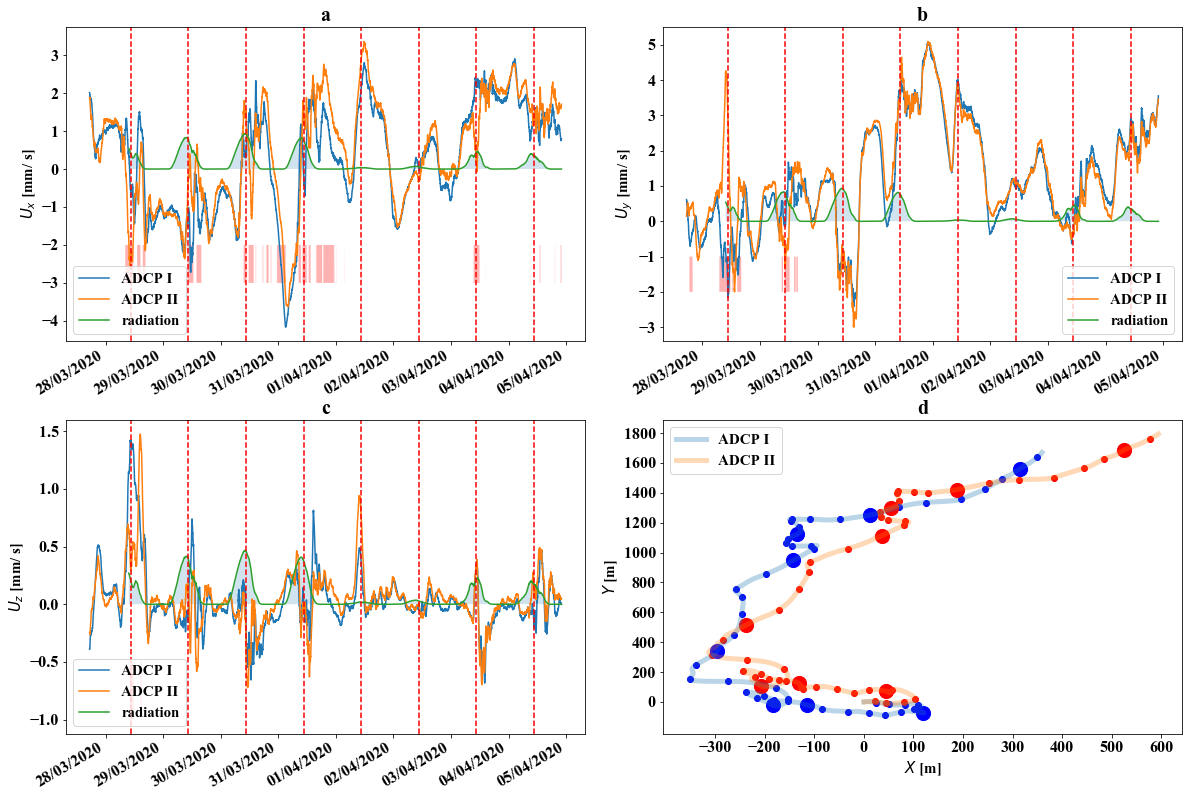

In [31]:
import matplotlib.pyplot as p
start = datetime.datetime(2020, 3, 27, 16,30)

t11=100
t22=12000
tr11=1080
tr22=12000

ra.index=np.arange(1080,12000,1)
ra=rad.iloc[0:10920]
ra.columns=['0','1','2']
r=ra['2']
rr=r.rolling(t0,center=True).mean()

time = [start + datetime.timedelta(minutes=i-100) for i in range(t11,t22)]
rtime = [start + datetime.timedelta(minutes=i-100) for i in range(tr11,tr22)]

p.figure(figsize=(20, 13))

p.subplot(2,2,1)

p.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter('%d/%m/20%y'))

y1 = [1000*UI1[i]/sin for i in range(t11, t22)]
y2 =[1000*UII1[i]/sin for i in range(t11, t22)]
p.plot(time,y1,time,y2,rtime,rr/100)
p.legend(['ADCP I','ADCP II','radiation'], fontsize=15)
p.tick_params(axis='both', which='major', labelsize=14)
p.fill_between(time,-3,-2, where = (1000*abs(UI1-UII1)/sin > 0.8), facecolor='red', alpha=0.3,interpolate=True)
p.fill_between(rtime,0.001,rr/100,alpha=0.2)
for xc in range(1080,12000,1440):
    p.axvline(start + datetime.timedelta(minutes=xc),color='r', linestyle='--')
#p.ylabel('$U_x \/(mm\/ \/ s^{-1})$',fontsize=15)
p.ylabel('$U_x$ [mm/ s]',fontsize=15)
p.title('a',fontsize=20)
p.xticks(rotation = 30,ha='right') 
p.tick_params(axis='both', which='major', labelsize=16)



p.subplot(2,2,2)
p.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter('%d/%m/20%y'))

y3 = [1000*UI2[i]/sin for i in range(t11, t22)]
y4 =[1000*UII2[i]/sin for i in range(t11, t22)]
p.plot(time,y3,time,y4,rtime,rr/100)
p.legend(['ADCP I','ADCP II','radiation'], fontsize=15)
p.tick_params(axis='both', which='major', labelsize=14)
p.fill_between(time,-2,-1, where = (1000*abs(UI2-UII2)/sin > 0.8), facecolor='red', alpha=0.3,interpolate=True)
p.fill_between(rtime,0.001,rr/100,alpha=0.2)
for xc in range(1080,12000,1440):
    p.axvline(start + datetime.timedelta(minutes=xc),color='r', linestyle='--')
#p.ylabel('$U_y \/(mm\/ \/ s^{-1})$',fontsize=15)
p.ylabel('$U_y$ [mm/ s]',fontsize=15)
p.title('b',fontsize=20)
p.xticks(rotation = 30,ha='right') 
p.tick_params(axis='both', which='major', labelsize=16)


p.subplot(2,2,3)
p.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter('%d/%m/20%y'))

y3 = [1000*UI3[i]/sin for i in range(t11, t22)]
y4 =[1000*UII3[i]/sin for i in range(t11, t22)]
p.plot(time,y3,time,y4,rtime,rr/100/2)
p.legend(['ADCP I','ADCP II','radiation'], fontsize=15)
p.tick_params(axis='both', which='major', labelsize=14)
p.fill_between(time,-1,-0.5, where = (1000*abs(UI3-UII3)/sin > 0.8), facecolor='red', alpha=0.3,interpolate=True)
p.fill_between(rtime,0.001,rr/100/2,alpha=0.2)
for xc in range(1080,12000,1440):
    p.axvline(start + datetime.timedelta(minutes=xc),color='r', linestyle='--')
#p.ylabel('$U_z \/(mm\/ \/ s^{-1})$',fontsize=15)
p.ylabel('$U_z$ [mm/ s]',fontsize=15)
p.title('c',fontsize=20)
p.xticks(rotation = 30,ha='right') 
p.tick_params(axis='both', which='major', labelsize=16)




p.subplot(2,2,4)

p.plot(s1,s2,label='ADCP I',linewidth=5, alpha=0.3)
p.plot(Is1,Is2,label='ADCP II',linewidth=5, alpha=0.3)

p.xlabel('$X$ [m]',fontsize=15)
p.ylabel('$Y$ [m]',fontsize=15)
p.legend(fontsize=15)
p.title('d',fontsize=20)
p.xticks(range(-300, 700, 100)) 
p.yticks(range(0, 1900, 200)) 

xmi=100
xmf=12001
xm=xmi
while xm < xmf:
    p.scatter(s1[xm],s2[xm],color='b')
    p.scatter(Is1[xm],Is2[xm],color='r')
    xm=xm+240

xmi=100
xmf=12001
xm=xmi
while xm < xmf:
    p.scatter(s1[xm],s2[xm],color='b',s=200)
    p.scatter(Is1[xm],Is2[xm],color='r',s=200)
    xm=xm+1440

p.tick_params(axis='both', which='major', labelsize=16)
p.subplots_adjust(wspace=0.15, hspace=0.25)
p.savefig("Fig 1.png",dpi=600)